<h1>KNN</h1>
<h3>CANCER DETECTION USING K-NEAREST NEIGHBORS</h3>

In [1]:
!pip install sklearn
!pip install mglearn==0.1.7
!pip install scipy
!pip install numpy
import numpy as np
import pandas as pd
import seaborn as sns
import mglearn
import matplotlib.pyplot as plt

E:\Anacond\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
E:\Anacond\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer keys : {}".format(cancer.keys()))

cancer keys : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print("shape of the data : {}".format(cancer.data.shape))

shape of the data : (569, 30)


In [4]:
print("sample counts of data :\n{}".format({n: v for n,v in zip(cancer.target_names , np.bincount(cancer.target))}))

sample counts of data :
{'malignant': 212, 'benign': 357}


In [5]:
print("feature names: \n{}".format(cancer.feature_names))

feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(cancer['data'],cancer['target'],random_state = 43)

In [7]:
print("x_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))

x_train shape : (426, 30)
y_train shape : (426,)


In [8]:
print("x_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

x_test shape : (143, 30)
y_test shape : (143,)


In [9]:
pd.set_option('display.max_columns', 50)
cancer_dataframe = pd.DataFrame(X_train,columns = cancer.feature_names)
cancer_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.770,21.41,82.02,507.4,0.08749,0.06601,0.03112,0.02864,0.1694,0.06287,0.7311,1.748,5.118,53.65,0.004571,0.01790,0.021760,0.017570,0.033730,0.005875,13.75,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871
1,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,0.1742,0.06059,0.5375,2.927,3.618,29.11,0.011590,0.01124,0.000000,0.000000,0.030040,0.003324,10.49,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
2,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.441,3.312,34.62,0.007514,0.01099,0.007665,0.008193,0.041830,0.005953,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
3,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.188,8.077,106.00,0.006883,0.01094,0.018180,0.019170,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
4,14.470,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,0.2542,1.079,2.615,23.11,0.007138,0.04653,0.038290,0.011620,0.020680,0.006111,16.22,31.73,113.50,808.9,0.13400,0.42020,0.40400,0.12050,0.3187,0.10230


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [63]:
y_pred = knn.predict(X_test)
print('Test set predictions : \n {}'.format(y_pred))

Test set predictions : 
 [1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [64]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [65]:
#using score method 
print("Test score is : {:.3f}".format(knn.score(X_test,y_test)))

Test score is : 0.972


<h2>Analyzing the classifier</h2>

In [67]:
training_accuracy = []
test_accuracy = []
neighbors_setting=range(1,11)


<function matplotlib.pyplot.legend(*args, **kwargs)>

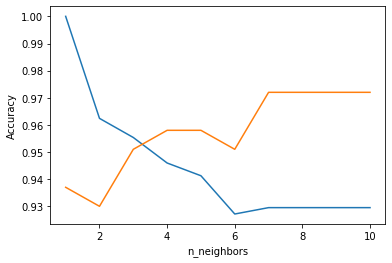

In [68]:
for n_neighbors in neighbors_setting:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_setting,training_accuracy,label= 'training accuracy')    
plt.plot(neighbors_setting,test_accuracy,label= 'testing accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend